## 파이썬 기초다루기
### 실제 데이터셋 분석 실습하기 
#### 0630 memo

-----

그동안 배웠던 Python, Pandas, 시각화 등을 이용해서   
타이타닉 데이터셋을 분석해보겠다.

### 타이타닉 데이터셋 실습 ##

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info() #object는 결측치가 있다는거!  // 결측치를 어떻게 해결할지도 중요!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include = 'all') #이상치를 얼추 예상할 수 있다. / # 독립성 검증은 PCA 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Mr. Thomas",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


여기까지 데이터 구조를 파악할 수 있었다. 

1. 결측치를 어떻게 처리할지 고민해야함
2. 이상치 확인을 했지만 이상치는 없는듯 한다. 

In [6]:
df.isnull() #전체 결측치 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df['Age'].isnull().sum()

177

In [8]:
# 결측치 제거 방법 (열을 지정할 수 도 있음)
df.dropna()
df.dropna(subset=['Age','Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 결측치 대체하기!

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# 결측치를 단순하게 대체하는 방법 

df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

177

In [11]:
sur_mean1 = df[df['Survived'] == 1]['Age'].mean()
sur_mean0 = df[df['Survived'] == 0]['Age'].mean()

#df[df['Survived'] ==1]['Age'].fillna(sur_mean1)
#df[df['Survived'] ==0]['Age'].fillna(sur_mean0)

print(sur_mean1)

df[df['Survived'] ==1]['Age'].fillna(sur_mean1)
df[df['Survived'] ==0]['Age'].fillna(sur_mean1)

df

28.343689655172415


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df['Age'][df['Survived']==1]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [18]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


필요한 컬럼만 남기고 나머지 컬럼 삭제 

In [19]:
df = df[['PassengerId','Survived','Pclass','Name']]

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name'], dtype='object')

## 시각화

       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]


<AxesSubplot:>

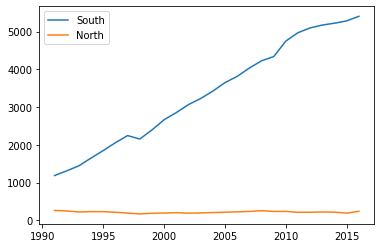

In [21]:
import pandas as pd

df = pd.read_excel('data/남북한발전전력량.xlsx')

df_ns = df.iloc[[0,5], 3:]

df_ns.index = [ 'South', 'North']

df_ns.columns = df_ns.columns.map(int)
print(df_ns.head())

# df_ns.plot()

df_T = df_ns.T

df_T.plot()



In [23]:
# 선그래프 실습 

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel('data/시도별 전출입 인구수.xlsx')
df.head()

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


### 데이터 구성 확인 

# 전출지별 데이터가 비어있으니 위에 있는걸로 채운다!

In [25]:
df = df.fillna(method='ffill') # 누락값을 위에 있는 정보로 채우겠다. 

In [26]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

## 질문

In [27]:
df_seoul = df[mask] #df[] 인덱싱 안에 T만 뽑아서 넣는건가??? 질문 

In [28]:
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True) # set_index()가 뭔지 

In [29]:
sr_one = df_seoul.loc['경기도']

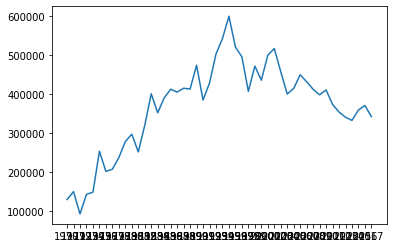

In [30]:
plt.plot(sr_one.index, sr_one.values)

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-package

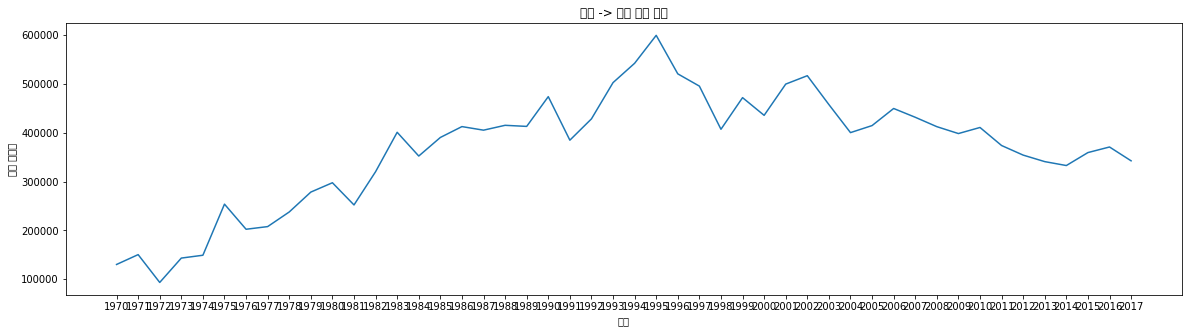

In [31]:
plt.figure(figsize=(20,5))  # 그래프 사이즈 

plt.plot(sr_one)

plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

In [32]:
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf" #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [33]:
# 맛간을 이용한 전남 분석!

In [34]:
mask = (df['전출지별'] == '전라북도') & (df['전입지별'] != '전라북도')

In [35]:
df_jn = df[mask] #df[] 인덱싱 안에 T만 뽑아서 넣는건가??? 질문 

In [36]:
df_jn = df_jn.drop(['전출지별'], axis = 1)
df_jn.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_jn.set_index('전입지', inplace = True) # set_index()가 뭔지 

In [37]:
sr_one = df_jn.loc['서울특별시']

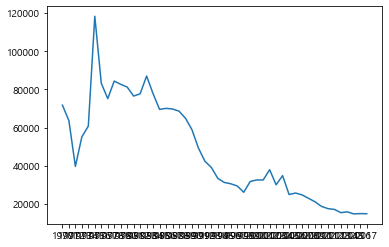

In [38]:
plt.plot(sr_one.index, sr_one.values)

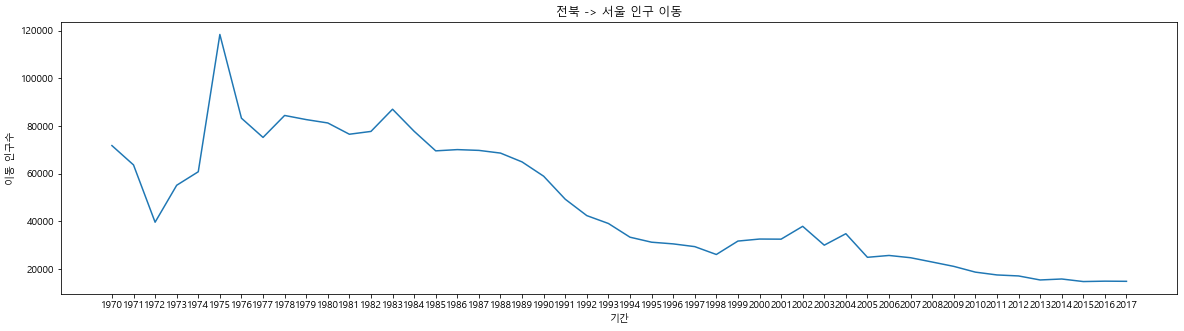

In [39]:
plt.figure(figsize=(20,5))  # 그래프 사이즈 

plt.plot(sr_one)

plt.title('전북 -> 서울 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

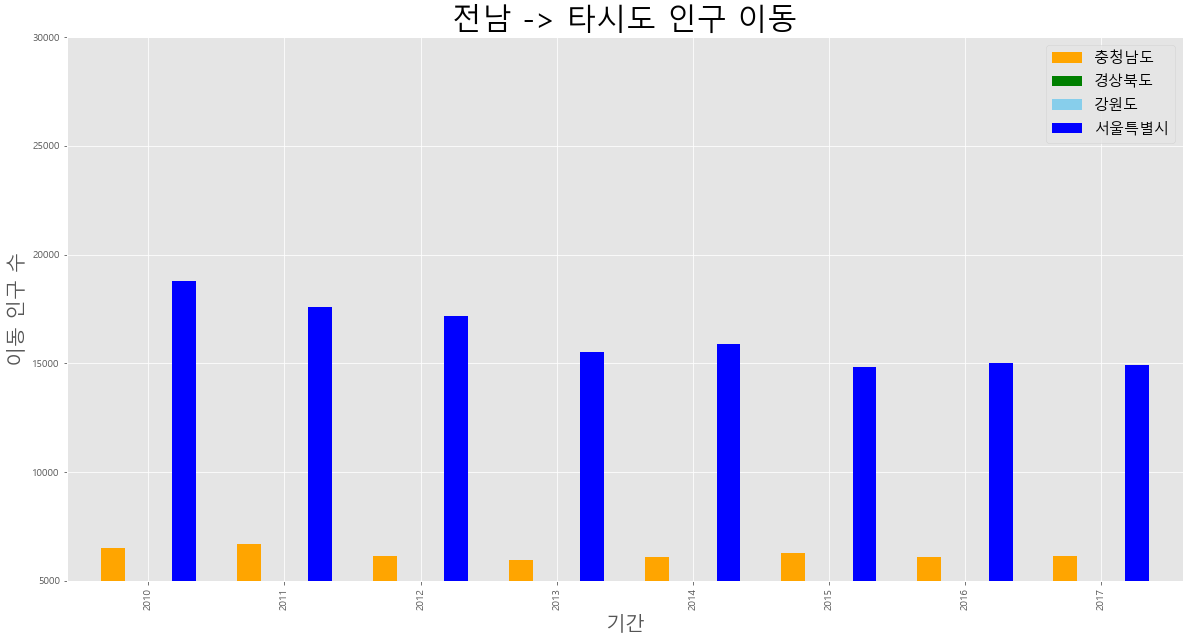

In [40]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years = list(map(str, range(2010, 2018))) 
df_4 = df_jn.loc[['충청남도','경상북도', '강원도', '서울특별시'], col_years]
df_4 = df_4.transpose()
plt.style.use('ggplot') # 스타일 서식 지정
df_4.index = df_4.index.map(int)
# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
color=['orange', 'green', 'skyblue', 'blue'])
plt.title('전남 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)
plt.show()

In [41]:
city_df = pd.read_excel('data/시도별 전출입 인구수.xlsx')
city_df = city_df.fillna(method='ffill')
filter =  (city_df['전출지별'] == '전라남도') & (city_df['전입지별'] != '전라남도')
jeonnam_df = city_df[filter]
jeonnam_df.rename({'전입지별':'전입지'}, axis=1, inplace=True)
jeonnam_df.set_index('전입지', inplace=True)
jeonnam_df.drop(columns=['전출지별'])
kyeongnam_sr = jeonnam_df.loc['경상남도']


C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
